In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np


In [2]:
(train_images, train_labels), _ = mnist.load_data()
train_images = np.array(train_images).reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1
)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1
)

In [4]:
from tensorflow import keras

def get_model():
    model = keras.Sequential([
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [5]:
model = get_model()

history_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

2023-10-24 23:56:11.022990: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-10-24 23:56:13.544292: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301056000 exceeds 10% of free system memory.


Epoch 1/10
373/375 [============================>.] - ETA: 0s - loss: 0.6231 - accuracy: 0.8096

2023-10-24 23:56:22.575368: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75264000 exceeds 10% of free system memory.


375/375 [==============================] - 9s 22ms/step - loss: 0.6217 - accuracy: 0.8100 - val_loss: 0.2845 - val_accuracy: 0.9133
Epoch 2/10
375/375 [==============================] - 7s 19ms/step - loss: 0.2556 - accuracy: 0.9202 - val_loss: 0.2366 - val_accuracy: 0.9277
Epoch 3/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1682 - accuracy: 0.9471 - val_loss: 0.1661 - val_accuracy: 0.9485
Epoch 4/10
375/375 [==============================] - 7s 18ms/step - loss: 0.1200 - accuracy: 0.9625 - val_loss: 0.1388 - val_accuracy: 0.9568
Epoch 5/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0885 - accuracy: 0.9718 - val_loss: 0.1555 - val_accuracy: 0.9538
Epoch 6/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0678 - accuracy: 0.9785 - val_loss: 0.1155 - val_accuracy: 0.9668
Epoch 7/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0486 - accuracy: 0.9848 - val_loss: 0.1267 - val_accuracy: 0.9631
Epoch 8/10

In [6]:
model = get_model()

history_zeros = model.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10


2023-10-24 23:59:07.510174: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301056000 exceeds 10% of free system memory.


375/375 [==============================] - ETA: 0s - loss: 0.2949 - accuracy: 0.9144

2023-10-24 23:59:13.276126: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75264000 exceeds 10% of free system memory.


375/375 [==============================] - 6s 14ms/step - loss: 0.2949 - accuracy: 0.9144 - val_loss: 0.1630 - val_accuracy: 0.9537
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1252 - accuracy: 0.9630 - val_loss: 0.1119 - val_accuracy: 0.9680
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0814 - accuracy: 0.9757 - val_loss: 0.0993 - val_accuracy: 0.9686
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0580 - accuracy: 0.9825 - val_loss: 0.0965 - val_accuracy: 0.9713
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0435 - accuracy: 0.9876 - val_loss: 0.0784 - val_accuracy: 0.9781
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0332 - accuracy: 0.9905 - val_loss: 0.0803 - val_accuracy: 0.9755
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0242 - accuracy: 0.9934 - val_loss: 0.0854 - val_accuracy: 0.9756
Epoch 8/10

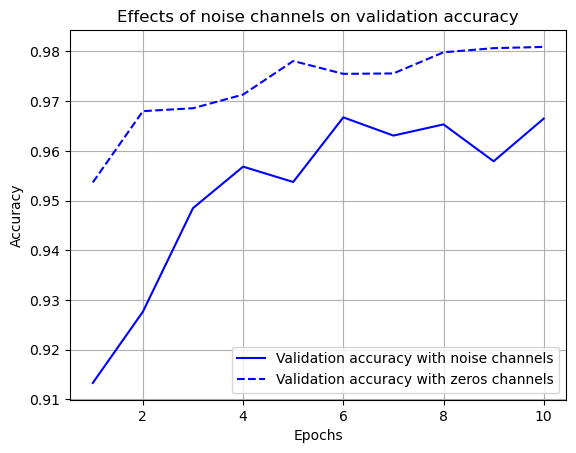

In [7]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]

epochs = range(1, 11)

plt.plot(epochs, val_acc_noise, "b-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros channels")
plt.title("Effects of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()